<a href="https://colab.research.google.com/github/Nyawira12/Core-Week-One-IP/blob/master/Python_Notebook_Solution_Moringa_Data_Science_Core_W2_Lilian_Kibathi_Independent_Project_2020_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.0 KEY DEFINITIONS**

## 1.1 Research Question

Provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania, and Uganda between 2016-2018 while providing insights into some of the key demographic factors that might drive individuals’ financial outcomes.



## 1.2 Success Metrics

Determine which indidviduals are the most likely to have or use a bank account?

## 1.3 Research Context 

Financial Inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 13.9% of the adult population) have access to or use a commercial bank account.

Traditionally, access to bank accounts has been regarded as an indicator of financial inclusion. Despite the proliferation of mobile money in Africa and the growth of innovative fintech solutions, banks still play a pivotal role in facilitating access to financial services. Access to bank accounts enables households to save and facilitate payments while also helping businesses build up their credit-worthiness and improve their access to other financial services. Therefore, access to bank accounts is an essential contributor to long-term economic growth.

The context therefore focuses on East Africa and includes other metrics or variables that could have an effect on whether or not individuals have a bank account. 

## 1.4 Experimental Design 

In trying to answer the research question, the following steps were taken:


*   Loading the data set.
*   Preliminary exploration for better understanding.
*   External Validation.
*   Cleaning Procedures.
*   Exploratory Data Analysis.
*   Implementing the solution.
*   Challenging the solution.
*   Follow up questions.





## 1.5 Data Relevance
The data was relevant to the research, as in addition to providing statistics on banl status, it providied demographics that could be used to explain these results. 
It was obtained from Finscope and ranged from 2016-2018 maiing it relatively relevant in making current conclusions.

These are the files using in the project

Dataset Files:

1. Variable Definitions: http://bit.ly/VariableDefinitions 
2. Dataset: http://bit.ly/FinancialDataset

# **2.0 DATA LOADING & PRELIMINARY EXPLORATION**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

In [ ]:
Financial_df = pd.read_csv("Financial Dataset - 1.csv")
Variable_Def = pd.read_csv("VariableDefinitions.csv")

In [ ]:
print('This dataset has ' + str(Financial_df.shape[0]) + ' rows, and ' + str(Financial_df.shape[1]) + ' columns')
print('This dataset has ' + str(Variable_Def.shape[0]) + ' rows, and ' + str(Variable_Def.shape[1]) + ' columns')

This dataset has 23524 rows, and 13 columns
This dataset has 12 rows, and 2 columns


In [ ]:
Financial_df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
Financial_df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
Financial_df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
Financial_df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
Financial_df.nunique()

country                      4
year                         6
uniqueid                  8735
Has a Bank account           2
Type of Location             2
Cell Phone Access            2
household_size              21
Respondent Age              85
gender_of_respondent         2
The relathip with head       6
marital_status               5
Level of Educuation          7
Type of Job                 10
dtype: int64

In [ ]:
Financial_df.describe()

,year,household_size,Respondent Age
count,23524.000000,23496.000000,23490.000000
mean,2016.979000,3.681818,38.804300
std,0.899669,2.279933,16.519996
min,2016.000000,0.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2056.000000,21.000000,100.000000


The exploration reveals the average ages and sizes of respondents and household sizes respectively at 3.68 and 38.8 years. 
Furthermore, the data types of each columns are correctly matched. 

# **3.0 EXTERNAL VALIDATION**


External validation of the data set was performed through comparing with simial smaller data sets containing related information. Furthermore, surveys on related demographics in individual years provided further insight and valudation on the quality of the data. 
The following are the surveys related to these data sets:

-
- FinAccess Kenya 2018. 
- Finscope Rwanda 2016. 
- Finscope Tanzania 2017. 
- Finscope Uganda 2018. 

# **4.0 DATA CLEANING**

In [ ]:
Financial_df.isnull().sum()

country                   14
year                       0
uniqueid                   0
Has a Bank account        36
Type of Location          15
Cell Phone Access         11
household_size            28
Respondent Age            34
gender_of_respondent      34
The relathip with head     4
marital_status            32
Level of Educuation       29
Type of Job               30
dtype: int64

In [ ]:
Financial_df = Financial_df.dropna(0)

In [ ]:
Financial_df.isnull().sum()

country                   0
year                      0
uniqueid                  0
Has a Bank account        0
Type of Location          0
Cell Phone Access         0
household_size            0
Respondent Age            0
gender_of_respondent      0
The relathip with head    0
marital_status            0
Level of Educuation       0
Type of Job               0
dtype: int64

In [ ]:
Financial_df.columns = Financial_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
Financial_df.rename({'has_a_bank_account': 'bank_acc', 'type_of_location': 'location', 'cell_phone_access' : 'phone_access', 'the_relathip_with_head' : 'head_rlshpn', 'level_of_educuation' : 'education_level'}, axis=1, inplace=True)
Financial_df.head()

,country,year,uniqueid,bank_acc,location,phone_access,household_size,respondent_age,gender_of_respondent,head_rlshpn,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


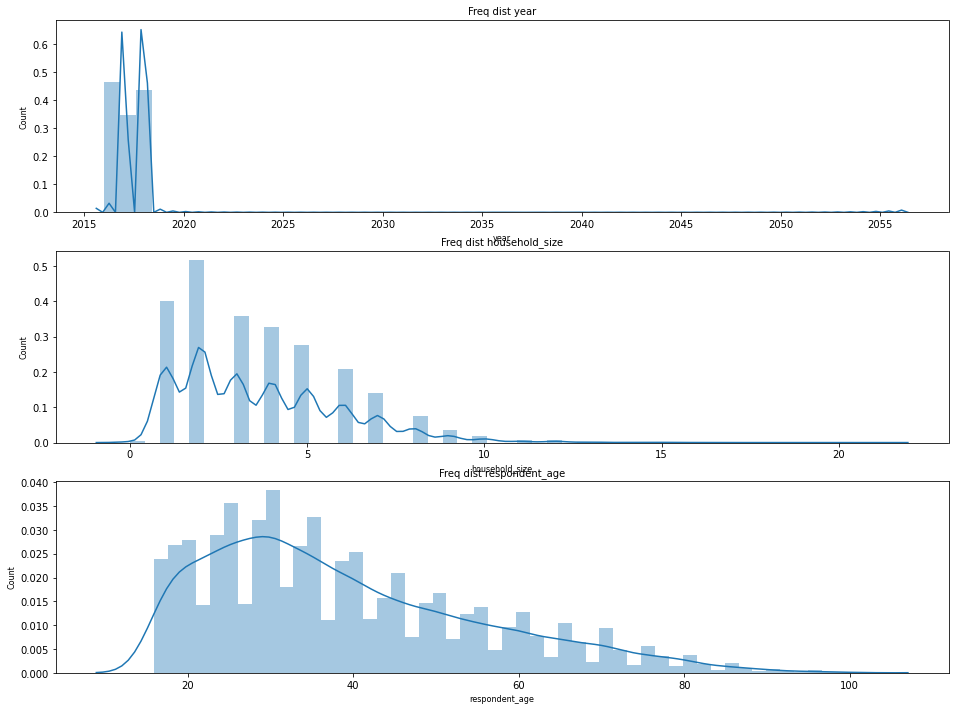

In [ ]:
col_names = ['year', 'household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):
        
    sns.distplot(Financial_df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.show()

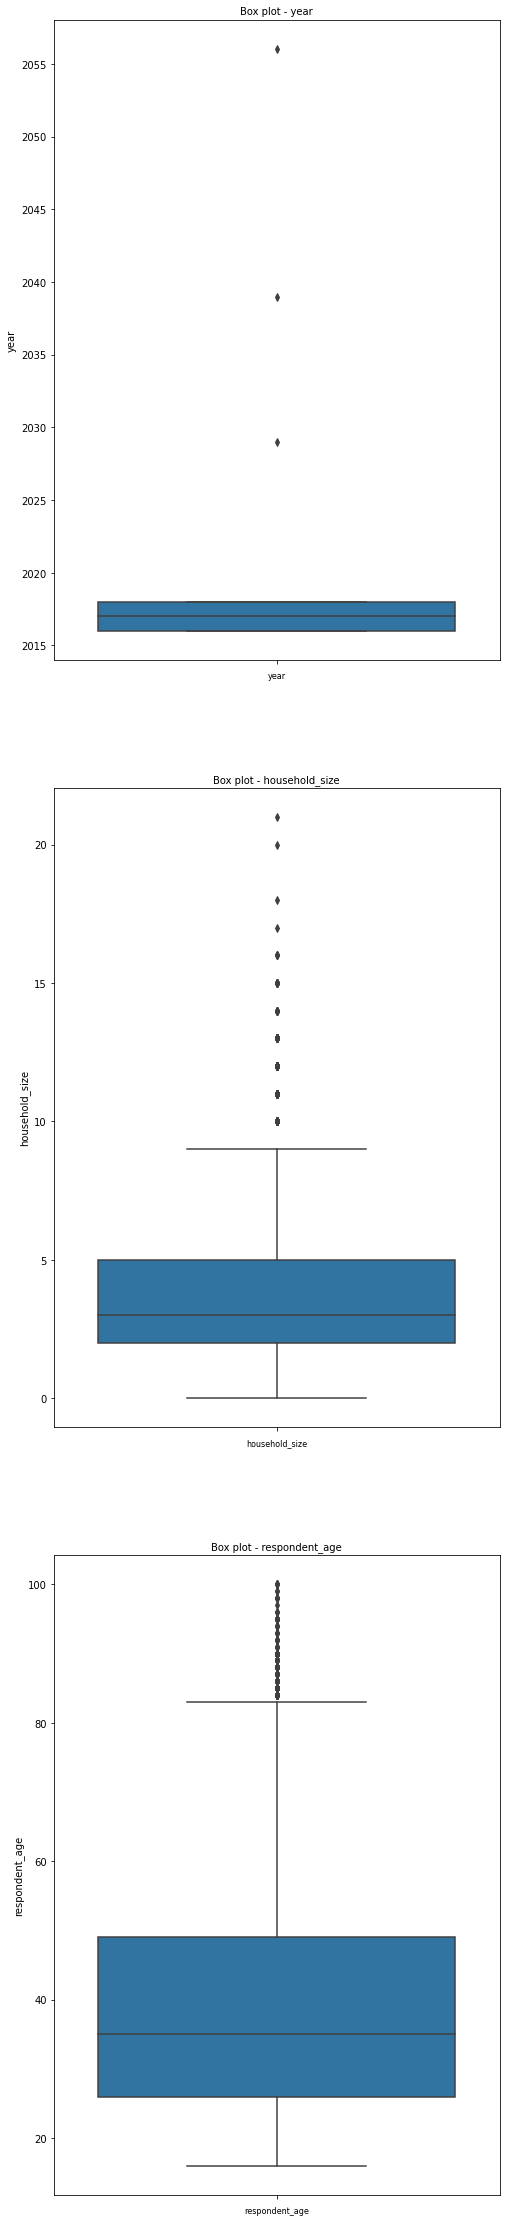

In [ ]:
col_names = ['year', 'household_size', 'respondent_age']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
        
    sns.boxplot(y=Financial_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

In [ ]:
Q1 = Financial_df.quantile(0.25)
Q3 = Financial_df.quantile(0.75)
IQR = Q3 - Q1
Financialdf_cln = Financial_df[~((Financial_df < (Q1 - 1.5 * IQR)) | (Financial_df > (Q3 + 1.5 * IQR))).any(axis=1)]
print(Financial_df)


      country  year  ...                  education_level                type_of_job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education              Self employed
23523  Uganda  2018  ...              Secondary education        

In [ ]:
print(Financialdf_cln)

      country  year  ...                  education_level                type_of_job
0       Kenya  2018  ...              Secondary education              Self employed
1       Kenya  2018  ...              No formal education       Government Dependent
2       Kenya  2018  ...  Vocational/Specialised training              Self employed
3       Kenya  2018  ...                Primary education  Formally employed Private
4       Kenya  2018  ...                Primary education        Informally employed
...       ...   ...  ...                              ...                        ...
23512  Uganda  2018  ...              No formal education               Other Income
23519  Uganda  2018  ...              No formal education               Other Income
23520  Uganda  2018  ...              Secondary education               Other Income
23521  Uganda  2018  ...                Primary education               Other Income
23522  Uganda  2018  ...              Secondary education        

The cleaning efforts revealed that the three numerical variables were skewed positively, with the years, household size and respondent's ages presenting outliers. 
This included records from 2029, 2039 and 2056, households of sizes in the ranges of and surpassin 10 - 20 and respondents aged 80 - 100 years. 
These outliers were dealth with by dropping using the semi-IQR values as boundaries below and above which observations should not be considered. 

# **5.0 EXPLORATORY ANALYSIS**

## 5.1 Univariate Analysis

In [ ]:
Financialdf_cln = Financialdf_cln.drop(['country','uniqueid', 'bank_acc','location' , 'phone_access',	'gender_of_respondent','head_rlshpn', 'marital_status',	'education_level',	'type_of_job'], axis=1)

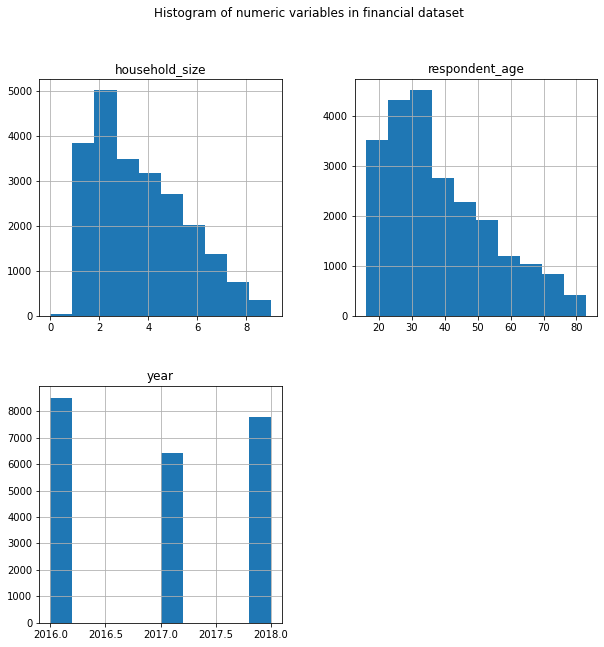

In [ ]:
Financialdf_cln.hist(bins=10, figsize=(10,10))
plt.suptitle("Histogram of numeric variables in financial dataset")
plt.savefig('Financial access Histogram')
plt.show()

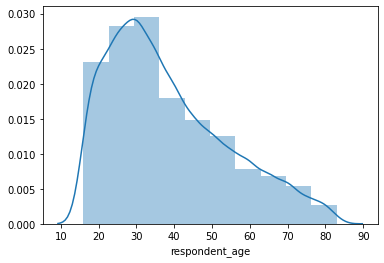

In [ ]:
sns.distplot(Financialdf_cln['respondent_age'], bins=10)

In [ ]:
Max = Financial_df["respondent_age"].max()
Min = Financial_df["respondent_age"].min()

Max - Min

84.0

In [ ]:
Financial_df["respondent_age"].quantile([0.25, 0.5, 0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [ ]:
 
Financial_df["respondent_age"].skew()

0.840661747532081

In [ ]:
Financial_df["respondent_age"].kurt()

0.09844652254807196

In [ ]:
Max = Financial_df['household_size'].max()
Min = Financial_df['household_size'].min()

Max - Min

21.0

In [ ]:
Financial_df['household_size'].quantile([0.25, 0.5, 0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
Financial_df['household_size'].skew()

0.9741086837897069

In [ ]:
Financial_df['household_size'].kurt()

1.1538690689335573

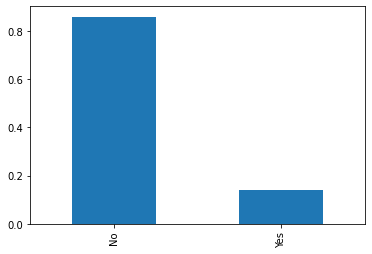

In [ ]:
(Financial_df['bank_acc'].value_counts()/len(Financial_df)).plot.bar()

In [ ]:
Financial_df['bank_acc'].value_counts()

No     20046
Yes     3297
Name: bank_acc, dtype: int64

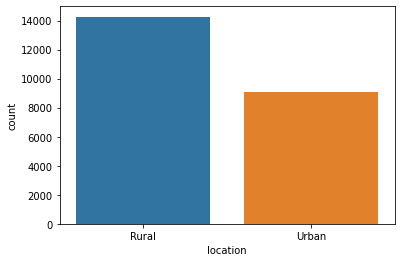

In [ ]:
sns.countplot(Financial_df['location'])

In [ ]:
Financial_df['location'].value_counts()

Rural    14264
Urban     9079
Name: location, dtype: int64

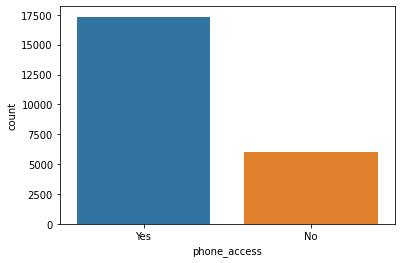

In [ ]:
sns.countplot(Financial_df['phone_access'])

In [ ]:
Financial_df['phone_access'].value_counts()

Yes    17334
No      6009
Name: phone_access, dtype: int64

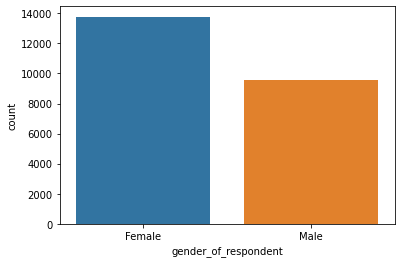

In [ ]:
sns.countplot(Financial_df['gender_of_respondent'])

In [ ]:
Financial_df['gender_of_respondent'].value_counts()

Female    13767
Male       9576
Name: gender_of_respondent, dtype: int64

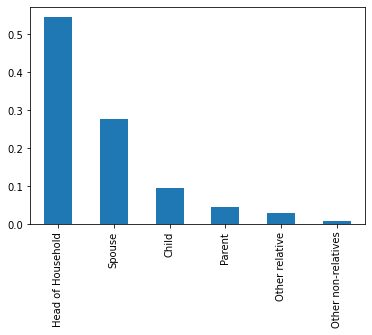

In [ ]:
(Financial_df['head_rlshpn'].value_counts()/len(Financial_df)).plot.bar()

In [ ]:
Financial_df['head_rlshpn'].value_counts()

Head of Household      12730
Spouse                  6471
Child                   2221
Parent                  1069
Other relative           663
Other non-relatives      189
Name: head_rlshpn, dtype: int64

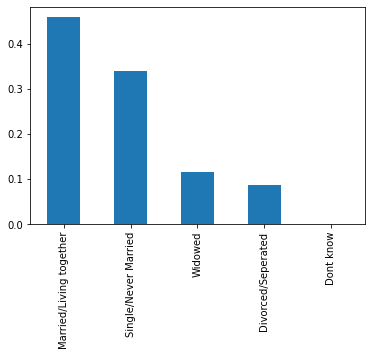

In [ ]:
(Financial_df['marital_status'].value_counts()/len(Financial_df)).plot.bar()

In [ ]:
Financial_df['marital_status'].value_counts()

Married/Living together    10700
Single/Never Married        7903
Widowed                     2683
Divorced/Seperated          2049
Dont know                      8
Name: marital_status, dtype: int64

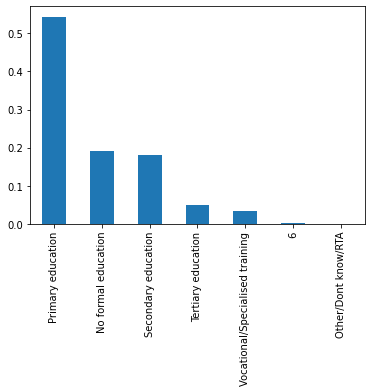

In [ ]:
(Financial_df['education_level'].value_counts()/len(Financial_df)).plot.bar()

In [ ]:
Financial_df['education_level'].value_counts()

Primary education                  12689
No formal education                 4467
Secondary education                 4207
Tertiary education                  1144
Vocational/Specialised training      801
6                                     27
Other/Dont know/RTA                    8
Name: education_level, dtype: int64

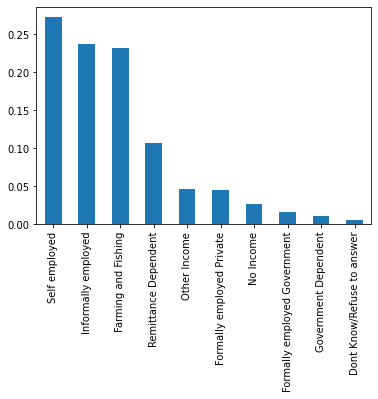

In [ ]:
(Financial_df['type_of_job'].value_counts()/len(Financial_df)).plot.bar()

In [ ]:
Financial_df['type_of_job'].value_counts()

Self employed                   6361
Informally employed             5550
Farming and Fishing             5422
Remittance Dependent            2509
Other Income                    1077
Formally employed Private       1048
No Income                        618
Formally employed Government     386
Government Dependent             247
Dont Know/Refuse to answer       125
Name: type_of_job, dtype: int64

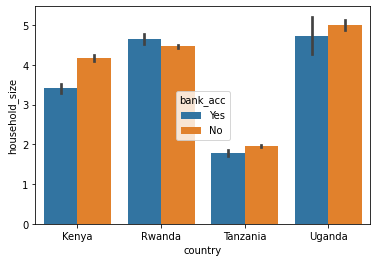

In [ ]:
sns.barplot(x='country', y='household_size', hue ='bank_acc', data = Financial_df)

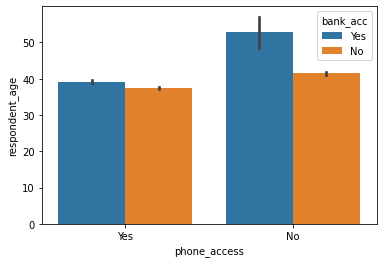

In [ ]:
sns.barplot(x='phone_access', y='respondent_age', hue ='bank_acc', data = Financial_df)

The multivariate analysis revealed how various numerical and categorical variables behaved such as the median age of respondents, being between 20-40 years. 
Furthermore, most respondents had access to a phone, came from rural areas, were female, married, were the head of their households and were self employed. Further examination of the graphs reveals how the respondents were distributed relative to their answers. 

## 5.2 Bivariate Analysis

In [ ]:
Financial_df["bank_account"] = np.where(Financial_df["bank_acc"].str.contains("Yes", "No"), 1, 0)

In [ ]:
Financial_df.head()

,country,year,uniqueid,bank_acc,location,phone_access,household_size,respondent_age,gender_of_respondent,head_rlshpn,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


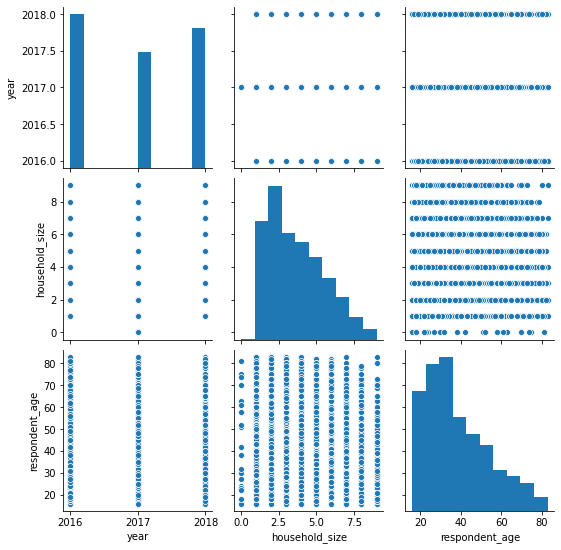

In [ ]:
sns.pairplot(Financialdf_cln)
plt.show()

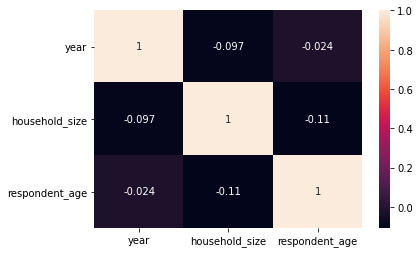

In [ ]:
sns.heatmap(Financialdf_cln.corr(),annot=True)
plt.show()

In [ ]:
Financialdf_cln.corr()

,year,household_size,respondent_age
year,1.000000,-0.11040,0.021896
household_size,-0.110400,1.00000,-0.153640
respondent_age,0.021896,-0.15364,1.000000


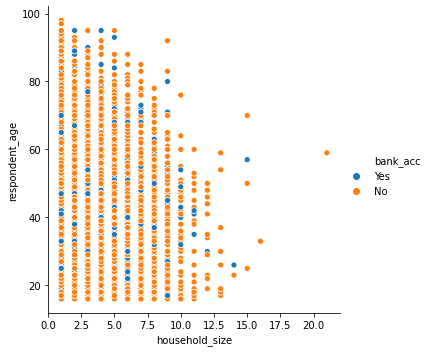

In [ ]:
sns.relplot( x = 'household_size', y = 'respondent_age', hue = 'bank_acc',data= Financial_df)

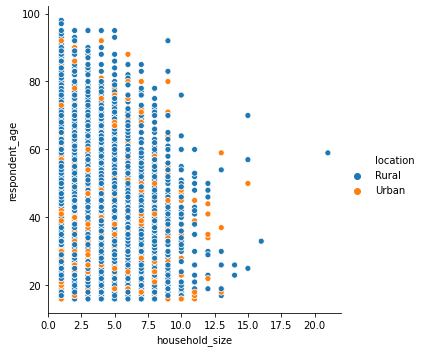

In [ ]:
sns.relplot( x = 'household_size', y = 'respondent_age', hue = 'location',data= Financial_df)

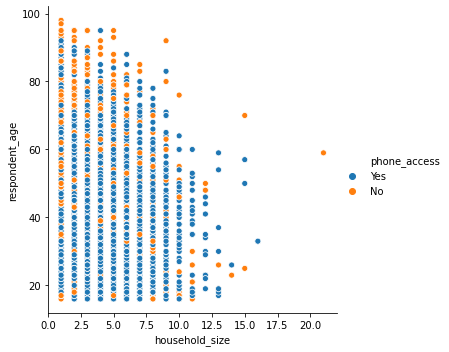

In [ ]:
sns.relplot( x = 'household_size', y = 'respondent_age', hue = 'phone_access',data= Financial_df)

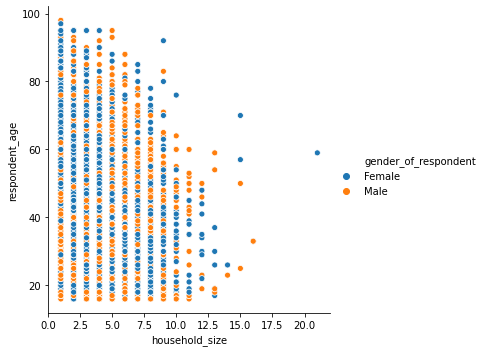

In [ ]:
sns.relplot( x = 'household_size', y = 'respondent_age', hue = 'gender_of_respondent',data= Financial_df)

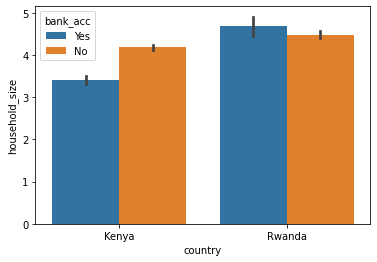

In [ ]:
sns.barplot(x= 'country', y = 'household_size', data = Financial_df, hue='bank_acc')

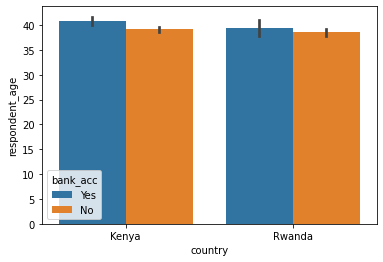

In [ ]:
sns.barplot(x= 'country', y = 'respondent_age', data = Financial_df, hue='bank_acc')

In [ ]:
Financial_df.groupby('country')['gender_of_respondent'].value_counts()

country  gender_of_respondent
Kenya    Female                  3480
         Male                    2584
Rwanda   Female                  1372
         Male                     988
Name: gender_of_respondent, dtype: int64

In [ ]:
Financial_df.groupby('location')['bank_acc'].value_counts()

location  bank_acc
Rural     No          4781
          Yes          803
Urban     No          1845
          Yes          995
Name: bank_acc, dtype: int64

In [ ]:
Financial_df.groupby('gender_of_respondent')['marital_status'].value_counts()

gender_of_respondent  marital_status         
Female                Married/Living together    2676
                      Single/Never Married       1010
                      Widowed                     852
                      Divorced/Seperated          313
                      Dont know                     1
Male                  Married/Living together    2285
                      Single/Never Married       1005
                      Divorced/Seperated          165
                      Widowed                     110
                      Dont know                     7
Name: marital_status, dtype: int64

In [ ]:
Financial_df.groupby('education_level')['bank_acc'].value_counts()

education_level                  bank_acc
6                                No             3
No formal education              No          1408
                                 Yes          105
Other/Dont know/RTA              Yes            6
                                 No             2
Primary education                No          3384
                                 Yes          515
Secondary education              No          1547
                                 Yes          637
Tertiary education               Yes          261
                                 No            83
Vocational/Specialised training  Yes          274
                                 No           199
Name: bank_acc, dtype: int64

This analysis reveals that correlation between the various variables is low, with the highest being a negative correlation of -0.119709 between household size and the age of respondent. 
The implication is that there are other key variables that are key contributors towards whether or not the respondents have a bank account. 
From the data set provided, we can see the following:

- Location matters as indivduals in urban areas are more likely to have bank accounts than those in rural areas. 
- The level of education also plays a role as individuals with a formal education are more likley to open bank accounts.

Also, age trends reveal that the figures are fairly similar for respondents over and above the mean age, 38.9 who own and do not own bank accounts. 
There are also different house hold sizes among the countries, however, those in Kenya, Rwanda and Uganda being relatively similar.  
A significant number of respondents we also female, from rural areas and did not have a bank account. 



## 5.3 Multivariate Analysis

To perform this analysis, it is necessary to change some of the relevant columns to numeric form from string form such as the location, gender of respondents, the bank account status and phone access to boolean values. 

In [ ]:
Financial_df.head()

,country,year,uniqueid,bank_acc,location,phone_access,household_size,respondent_age,gender_of_respondent,head_rlshpn,marital_status,education_level,type_of_job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
Financial_df["gender_of_respondent"] = np.where(Financial_df["gender_of_respondent"].str.contains("Male", "Female"), 1, 0)


In [ ]:
Financial_df["bank_account"] = np.where(Financial_df["bank_acc"].str.contains("Yes", "No"), 1, 0)


In [ ]:
Financial_df["location"] = np.where(Financial_df["location"].str.contains("Rural", "Urban"), 1, 0)

In [ ]:
Financial_df["phone_access"] = np.where(Financial_df["phone_access"].str.contains("Yes", "No"), 1, 0)

In [ ]:
Financial_df.drop(['country','year','uniqueid', 'marital_status', 'head_rlshpn','education_level','type_of_job'],axis=1,inplace=True)

Financial_df.head()

,bank_acc,location,phone_access,household_size,respondent_age,gender_of_respondent,bank_account
0,Yes,1,1,3,24.0,0,1
1,No,1,0,5,70.0,0,0
2,Yes,0,1,5,26.0,1,1
3,No,1,1,5,34.0,0,0
4,No,0,0,8,26.0,1,0


In [ ]:
Financial_df.corr()

,location,phone_access,household_size,respondent_age,gender_of_respondent,bank_account
location,1.000000,-0.137232,0.176982,0.136626,-0.006994,-0.238305
phone_access,-0.137232,1.000000,-0.032911,-0.087089,0.060449,0.209936
household_size,0.176982,-0.032911,1.000000,-0.162968,-0.005108,-0.121954
respondent_age,0.136626,-0.087089,-0.162968,1.000000,0.003068,0.039849
gender_of_respondent,-0.006994,0.060449,-0.005108,0.003068,1.000000,0.127568
bank_account,-0.238305,0.209936,-0.121954,0.039849,0.127568,1.000000


With initial analysis and cleaning being performed and correlation being tested and observed to be relatively low, it is now possible to proceed with exploring the data and implementing the solution. 

### 5.3.1 Principal Component Analysis 

In [ ]:
A = Financial_df.iloc[:,1:6].values
B = Financial_df.iloc[:, 1].values 

In [ ]:
from sklearn.model_selection import train_test_split

A_train, A_test, B_train, B_test = train_test_split(A, B, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
A_train = sc.fit_transform(A_train)
A_test = sc.transform(A_test)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
A_train = pca.fit_transform(A_train)
A_test = pca.transform(A_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_

explained_variance

array([0.25465842, 0.23546985, 0.20229888, 0.17139773, 0.13617512])

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
A_train = pca.fit_transform(A_train)
A_test = pca.transform(A_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(A_train, B_train)


B_pred = classifier.predict(A_test)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(B_test, B_pred)
print(cm)
print('Accuracy' , accuracy_score(B_test, B_pred))

[[ 441  116]
 [   4 1124]]
Accuracy 0.9287833827893175


### 5.3.2 Factor Analysis

In [ ]:
!pip install factor_analyzer==0.2.3

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [ ]:
chi_square_value,p_value=calculate_bartlett_sphericity(Financial_df)
chi_square_value, p_value

(1992.830265105942, 0.0)

In [ ]:
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer()
fa.analyze(Financial_df, 6, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,1.500726
1,1.179440
2,1.032705
3,0.878696
4,0.771602
5,0.636832


In [ ]:
fa = FactorAnalyzer()
fa.analyze(Financial_df, 3, rotation="varimax")
fa.loadings

,Factor1,Factor2,Factor3
location,0.683298,0.134793,-0.127482
phone_access,-0.126989,-0.090126,0.300517
household_size,0.291868,-0.214262,-0.050446
respondent_age,0.033536,0.813722,-0.031595
gender_of_respondent,0.027941,0.011012,0.216250
bank_account,-0.249892,0.083266,0.617967


In [ ]:
fa = FactorAnalyzer()
fa.analyze(Financial_df, 2, rotation="varimax")
fa.loadings

,Factor1,Factor2
location,0.084787,-0.451899
phone_access,-0.061711,0.329841
household_size,-0.176921,-0.245363
respondent_age,0.995209,-0.085991
gender_of_respondent,0.016955,0.138313
bank_account,0.083973,0.573744


In [ ]:
fa.get_factor_variance()

,Factor1,Factor2
SS Loadings,1.040079,0.728917
Proportion Var,0.173346,0.121486
Cumulative Var,0.173346,0.294833


### 5.3.3 Linear Discriminant Analysis 

In [ ]:
C = Financial_df.iloc[:,1:6].values
D = Financial_df.iloc[:, 1].values

In [ ]:
from sklearn.model_selection import train_test_split
C_train, C_test, D_train, D_test = train_test_split(C, D, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
C_train = sc.fit_transform(C_train)
C_test = sc.transform(C_test)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
C_train = lda.fit_transform(C_train, D_train)
C_test = lda.transform(C_test)

In [ ]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(C_train, D_train)
D_pred = classifier.predict(C_test)

In [ ]:
cm = confusion_matrix(D_test, D_pred)
print(cm)
print('Accuracy' + str(accuracy_score(D_test, D_pred)))

[[ 557    0]
 [   0 1128]]
Accuracy1.0


## 5.4 Implementing and Challenging the Solution

In [ ]:
Financial_df.corr()


,location,phone_access,household_size,respondent_age,gender_of_respondent,bank_account
location,1.000000,-0.137232,0.176982,0.136626,-0.006994,-0.238305
phone_access,-0.137232,1.000000,-0.032911,-0.087089,0.060449,0.209936
household_size,0.176982,-0.032911,1.000000,-0.162968,-0.005108,-0.121954
respondent_age,0.136626,-0.087089,-0.162968,1.000000,0.003068,0.039849
gender_of_respondent,-0.006994,0.060449,-0.005108,0.003068,1.000000,0.127568
bank_account,-0.238305,0.209936,-0.121954,0.039849,0.127568,1.000000


In implementing and evaluating the solution, the correlation between variables is still seen to be low, with the highest being 0.2745053 between the house_hold sizes and location. 
The solutions found using Principal Component Analysis were found to be relatively accurate at 84% with Factor Analysis being performed to further test this. 
However, the method revealed little information, with total variance form the three factors chosen contributing to slightly less than twenty percent of cumulative variance. 
Consequentlty, Linear Discriminant Analysis was perfromed to further examine the results. 

Performing the LDA challenged the results of the PCA which were 100% and 83.16% accurate in determing which factors were relevant when determining whether or not individuals had bank accounts. 
The PDA was relatively helpful at over eighter percent accuracy, but fell short in certain aspects when making predictions. Factor Analysis was however unhelpful in backing up these results. The LDA suggested that the model accurately predicted those who had or did not have bank accounts based on the provided variables. 

# **6.0 Follow-up Questions**

## 6.1 Did we have the right data?

Yes, the data provided was satisfacory in determining which aspects were relevant in predicting whether or not respondents had bank accounts. 
Variables such as education levels, age and employemnt are relevant when infleuncing individuals on whether or not to open bank accounts as they influence how informed they are on relevant information. 


## 6.2 Do we need other data to answer our question?

While the available information was helpful in providing answers to the question, additional data would better help in narrowing them down further. Information on specific country demographics like the increased wave on international investments in Rwanda, development of mobile money across the region and especially in Kenya and income levels would be especially insightful. 

## 6.3 Did we ask the right questions?

Yes. The right questions were asked. 